### This Jupyter notebook is used to run the ensemble neural network machine
### learning model to predict embrittlement of reactor pressure vessel (RPV)
### steel alloys. If you find the model useful, please cite the original reference:

### Jacobs, R., Yamamoto, T., Odette, G. R., Morgan, D. "Predictions and
### Uncertainty Estimates of Reactor Pressure Vessel Steel Embrittlement Using
### Machine Learning", submitted (2023)

### Note that this model was originally developed for academic research purposes. 
### Current work is ongoing to identify potential issues and update the model accordingly. Therefore, the model may evolve in the future and have newer versions that give slightly different answers. Any questions/feedback should be sent to:
### Ryan Jacobs (rjacobs3@wisc.edu)

First, we clone the RPV model Github repository to this Colab session:

In [9]:
import warnings
warnings.filterwarnings("ignore")
!git clone https://github.com/uw-cmg/RPV_model.git

fatal: destination path 'RPV_model' already exists and is not an empty directory.


Next, we install required software packages:

In [2]:
!pip install -r RPV_model/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 9.9 MB/s eta 0:00:00

Restart the runtime (Runtime -> Restart Runtime) for the new package installs to take effect

Add the path of the RPV_model repo so python can find it

In [3]:
import sys
sys.path.append('RPV_model')

Set the model type you'd like to run. Currently, 3 are available:

fullfit: The full fit model to the entire database of UCSB+PLOTTER data. This is the current production model

fullfit_ATR2anchors: A modified version of the full fit model in the paper. This model is fit to the same full UCSB+PLOTTER database, but includes additional synthetic "anchor" points of ATR2 flux values to try fixing some known extrapolation issues.

ATR2_only: Model fit to only the small ATR2 subset of data. For testing purposes only. Error bars are from fullfit production model.

highfluence_lowflux: Model fit to subset of high fluence, low flux data. For testing purposes only. Error bars are from fullfit production model.

In [1]:
model_folder = 'fullfit' # Or 'fullfit_ATR2anchors', ATR2_only', 'highfluence_lowflux'

Import the prediction function and your test data (an example is given in test_data.csv) and make predictions! Note the input features of your test data need to be in the same order as shown in this test file

In [4]:
from model_predict_df import make_predictions_DNN
import pandas as pd

df = pd.read_csv('RPV_model/test_data.csv')
preds = make_predictions_DNN(df, model_folder)

scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Display your predictions. The values in the "preds" column are predicted TTS values, in degrees Celsius. The "ebars" column is the calibrated, one sigma error bar from the ensemble model.

In [5]:
preds

,preds,ebars
0,14.001073,8.925599
1,14.001073,8.925599
2,27.393063,13.632395
3,27.393063,13.632395
4,12.671827,11.352390
5,21.425608,12.390108
6,18.096539,12.848585
7,18.096539,12.848585
8,28.334789,11.072144
9,33.445641,11.628885


Another approach is to simply edit a dictionary of the feature values below and make predictions. Note that each feature list needs to be the same length.

In [6]:
d = {'temperature_C': [287, 291.1, 292.2],
     'wt_percent_Cu': [0.04, 0.15, 0.15],
     'wt_percent_Ni': [0.74, 0.52, 0.52],
     'wt_percent_Mn': [0.6, 1.32, 1.32],
     'wt_percent_P': [0.012, 0.01, 0.01],
     'wt_percent_Si': [0.23, 0.2, 0.2],
     'wt_percent_C': [0.21, 0.21, 0.21],
     'log(fluence_n_cm2)': [18.664547962246548, 17.861534410859036, 19.012837224705173],
     'log(flux_n_cm2_sec)': [11.165741355311178, 10.389599950323971, 10.966255912381982]}

df_fromd = pd.DataFrame(d)
preds_new = make_predictions_DNN(df_fromd, model_folder)

preds_new

Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,preds,ebars
0,14.001073,8.925599
1,18.109430,12.839308
2,28.369940,11.057064


Here, we can take a designated temperature, composition, and set of flux values and make an embrittlement curve (TTS vs. fluence)

Predicting TTS embrittlement curve for flux = 30000000000
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
Predicting TTS embrittlement curve for flux = 3680000000000.0
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model
Predicting TTS embrittlement curve for flux = 100000000000000
Could not find designated model type in scikit-learn model library. Note the other supported modeltype is the keras.wrappers.scikit_learn.KerasRegressor model


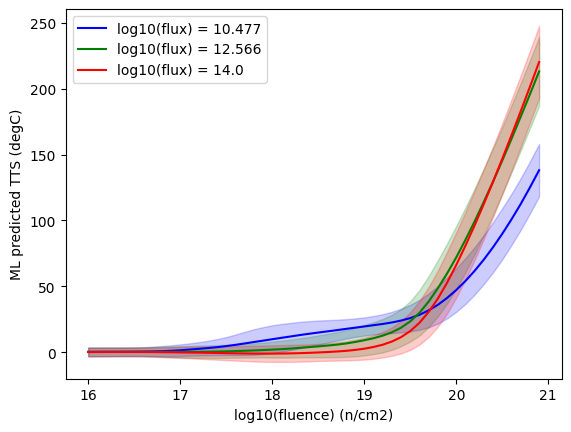

In [10]:
import numpy as np
from matplotlib import pyplot as plt

# Edit the desired temperature, composition and fluxes below
# Note the number of points to grid fluence can also be provided.
# Plotting a given flux value with 50 points will take about 45 seconds

########################################
########################################

d = {'temperature_C': 287,
     'wt_percent_Cu': 0.04,
     'wt_percent_Ni': 0.74,
     'wt_percent_Mn': 0.6,
     'wt_percent_P': 0.012,
     'wt_percent_Si': 0.23,
     'wt_percent_C': 0.21}

fluxes = [3*10**10, 3.68*10**12, 1*10**14]
num_points = 50

########################################
########################################

all_preds = list()
all_errs = list()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']
for flux in fluxes:
    print('Predicting TTS embrittlement curve for flux =', flux)
    log_fluence = np.arange(16, 21, 5/num_points)
    temp = [d['temperature_C'] for i in log_fluence]
    Cu = [d['wt_percent_Cu'] for i in log_fluence]
    Ni = [d['wt_percent_Ni'] for i in log_fluence]
    Mn = [d['wt_percent_Mn'] for i in log_fluence]
    P = [d['wt_percent_P'] for i in log_fluence]
    Si = [d['wt_percent_Si'] for i in log_fluence]
    C = [d['wt_percent_C'] for i in log_fluence]
    f = [np.log10(flux) for i in log_fluence]
    df_test = pd.DataFrame({'temperature_C': temp,
                            'wt_percent_Cu': Cu,
                            'wt_percent_Ni': Ni,
                            'wt_percent_Mn': Mn,
                            'wt_percent_P': P,
                            'wt_percent_Si': Si,
                            'wt_percent_C': C,
                            'log(fluence_n_cm2)': log_fluence,
                            'log(flux_n_cm2_sec)': f})
    preds_test = make_predictions_DNN(df_test, model_folder)
    all_preds.append(preds_test['preds'])
    all_errs.append(preds_test['ebars'])

plt.clf()
data = dict()
for i, flux in enumerate(fluxes):
    flux_val = str(round(np.log10(flux),3))
    data['Preds for Flux = '+flux_val] = all_preds[i]
    data['Ebars for Flux = '+flux_val] = all_errs[i]
    plt.plot(log_fluence, all_preds[i], label='log10(flux) = '+flux_val, color=colors[i])
    plt.fill_between(log_fluence, all_preds[i]+all_errs[i], all_preds[i]-all_errs[i], color=colors[i], alpha=0.2)

pd.DataFrame(data).to_csv('embrittlement_curve_data.csv', index=False)
plt.xlabel('log10(fluence) (n/cm2)')
plt.ylabel('ML predicted TTS (degC)')
plt.legend(loc='best')
plt.savefig('embrittlement_curve.png', dpi=300, bbox_inches='tight')
plt.show()
